In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from ast import literal_eval
from shapely.geometry import Polygon

In [3]:
pd.reset_option("display.max_columns", 50)

In [4]:
pwd

'C:\\Users\\Zhimin90\\Documents\\CPT\\Chicago_Pothole_Tracker\\modeling'

In [5]:
df = pd.read_csv("C:\\Users\\Zhimin90\\Documents\\CPT\\CSV\\2017-11-11_4frames_all", index_col=0, converters={"poly_coordinate": literal_eval})

In [6]:
df.iloc[:10,:]

,start_date,end_date,poly_coordinate,density
0,2017-11-11,2018-11-11,"[[-87.97726, 41.60687], [-87.97627018036073, 4...",-4.523966e-16
1,2017-11-11,2018-11-11,"[[-87.97627018036073, 41.60687], [-87.97528036...",-4.490958e-16
2,2017-11-11,2018-11-11,"[[-87.97528036072144, 41.60687], [-87.97429054...",-4.462013e-16
3,2017-11-11,2018-11-11,"[[-87.97429054108217, 41.60687], [-87.97330072...",-4.430034e-16
4,2017-11-11,2018-11-11,"[[-87.97330072144288, 41.60687], [-87.97231090...",-4.471651e-16
5,2017-11-11,2018-11-11,"[[-87.97231090180361, 41.60687], [-87.97132108...",-4.458753e-16
6,2017-11-11,2018-11-11,"[[-87.97132108216432, 41.60687], [-87.97033126...",-4.470463e-16
7,2017-11-11,2018-11-11,"[[-87.97033126252505, 41.60687], [-87.96934144...",-4.475956e-16
8,2017-11-11,2018-11-11,"[[-87.96934144288578, 41.60687], [-87.96835162...",-4.461419e-16
9,2017-11-11,2018-11-11,"[[-87.96835162324649, 41.60687], [-87.96736180...",-4.518665e-16


In [7]:
df.head(10)

,start_date,end_date,poly_coordinate,density
0,2017-11-11,2018-11-11,"[[-87.97726, 41.60687], [-87.97627018036073, 4...",-4.523966e-16
1,2017-11-11,2018-11-11,"[[-87.97627018036073, 41.60687], [-87.97528036...",-4.490958e-16
2,2017-11-11,2018-11-11,"[[-87.97528036072144, 41.60687], [-87.97429054...",-4.462013e-16
3,2017-11-11,2018-11-11,"[[-87.97429054108217, 41.60687], [-87.97330072...",-4.430034e-16
4,2017-11-11,2018-11-11,"[[-87.97330072144288, 41.60687], [-87.97231090...",-4.471651e-16
5,2017-11-11,2018-11-11,"[[-87.97231090180361, 41.60687], [-87.97132108...",-4.458753e-16
6,2017-11-11,2018-11-11,"[[-87.97132108216432, 41.60687], [-87.97033126...",-4.470463e-16
7,2017-11-11,2018-11-11,"[[-87.97033126252505, 41.60687], [-87.96934144...",-4.475956e-16
8,2017-11-11,2018-11-11,"[[-87.96934144288578, 41.60687], [-87.96835162...",-4.461419e-16
9,2017-11-11,2018-11-11,"[[-87.96835162324649, 41.60687], [-87.96736180...",-4.518665e-16


In [59]:
df["int_density"] = df.density.astype(int)
df.head(10)


,start_date,end_date,poly_coordinate,density,int_density
0,2017-11-11,2018-11-11,"[[-87.97726, 41.60687], [-87.97627018036073, 4...",-4.523966e-16,0
1,2017-11-11,2018-11-11,"[[-87.97627018036073, 41.60687], [-87.97528036...",-4.490958e-16,0
2,2017-11-11,2018-11-11,"[[-87.97528036072144, 41.60687], [-87.97429054...",-4.462013e-16,0
3,2017-11-11,2018-11-11,"[[-87.97429054108217, 41.60687], [-87.97330072...",-4.430034e-16,0
4,2017-11-11,2018-11-11,"[[-87.97330072144288, 41.60687], [-87.97231090...",-4.471651e-16,0
5,2017-11-11,2018-11-11,"[[-87.97231090180361, 41.60687], [-87.97132108...",-4.458753e-16,0
6,2017-11-11,2018-11-11,"[[-87.97132108216432, 41.60687], [-87.97033126...",-4.470463e-16,0
7,2017-11-11,2018-11-11,"[[-87.97033126252505, 41.60687], [-87.96934144...",-4.475956e-16,0
8,2017-11-11,2018-11-11,"[[-87.96934144288578, 41.60687], [-87.96835162...",-4.461419e-16,0
9,2017-11-11,2018-11-11,"[[-87.96835162324649, 41.60687], [-87.96736180...",-4.518665e-16,0


In [60]:
list = []
for index, row in df.iterrows():
    list.append( [row['start_date'],  row['end_date'],Polygon( row['poly_coordinate']), row['density'], row['int_density']] )

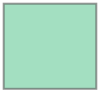

In [61]:
list[0][2]

In [62]:
gdf = gpd.GeoDataFrame(list, columns =['start_date','end_date', 'geometry', 'density', 'int_density']
    )

In [63]:
gdf.bounds

,minx,miny,maxx,maxy
0,-87.977260,41.60687,-87.976270,41.60778
1,-87.976270,41.60687,-87.975280,41.60778
2,-87.975280,41.60687,-87.974291,41.60778
3,-87.974291,41.60687,-87.973301,41.60778
4,-87.973301,41.60687,-87.972311,41.60778
...,...,...,...,...
249995,-87.487299,42.06083,-87.486309,42.06174
249996,-87.486309,42.06083,-87.485320,42.06174
249997,-87.485320,42.06083,-87.484330,42.06174
249998,-87.484330,42.06083,-87.483340,42.06174


In [64]:
gdf.total_bounds

array([-87.97726   ,  41.60687   , -87.48235018,  42.06173974])

In [14]:
xmin, ymin, xmax, ymax = gdf.total_bounds

In [69]:
grid_size = 10
xgrid = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ygrid = np.arange(ymin, ymax, (ymax-ymin)/grid_size)

In [77]:
c = 0
gdf["zone"] = None
for row in xgrid:
    for col in ygrid:
        print(row,col)
        current_index = gdf.cx[row:row+(xmax-xmin)/grid_size, col:col+(ymax-ymin)/grid_size].index
        gdf.iloc[current_index,5] = c
        print(current_index)
        #print(gdf.iloc[current_index,:])
        #gdf.cx[row:row+(xmax-xmin)/100, col:col+(ymax-ymin)/100]["zone"] = c
        c+=1

-87.97726 41.60687
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25041, 25042, 25043, 25044, 25045, 25046, 25047, 25048, 25049,
            25050],
           dtype='int64', length=2601)
-87.97726 41.652356973947896
Int64Index([24500, 24501, 24502, 24503, 24504, 24505, 24506, 24507, 24508,
            24509,
            ...
            50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049,
            50050],
           dtype='int64', length=2652)
-87.97726 41.69784394789579
Int64Index([49500, 49501, 49502, 49503, 49504, 49505, 49506, 49507, 49508,
            49509,
            ...
            75041, 75042, 75043, 75044, 75045, 75046, 75047, 75048, 75049,
            75050],
           dtype='int64', length=2652)
-87.97726 41.743330921843686
Int64Index([ 74500,  74501,  74502,  74503,  74504,  74505,  74506,  74507,
             74508,  74509,
            ...
            100041, 100042, 100043, 100044,

Int64Index([224599, 224600, 224601, 224602, 224603, 224604, 224605, 224606,
            224607, 224608,
            ...
            249641, 249642, 249643, 249644, 249645, 249646, 249647, 249648,
            249649, 249650],
           dtype='int64', length=2652)
-87.82878705410822 41.60687
Int64Index([  149,   150,   151,   152,   153,   154,   155,   156,   157,
              158,
            ...
            25191, 25192, 25193, 25194, 25195, 25196, 25197, 25198, 25199,
            25200],
           dtype='int64', length=2652)
-87.82878705410822 41.652356973947896
Int64Index([24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657,
            24658,
            ...
            50191, 50192, 50193, 50194, 50195, 50196, 50197, 50198, 50199,
            50200],
           dtype='int64', length=2704)
-87.82878705410822 41.69784394789579
Int64Index([49649, 49650, 49651, 49652, 49653, 49654, 49655, 49656, 49657,
            49658,
            ...
            75191, 75192, 75193, 75

Int64Index([174749, 174750, 174751, 174752, 174753, 174754, 174755, 174756,
            174757, 174758,
            ...
            199791, 199792, 199793, 199794, 199795, 199796, 199797, 199798,
            199799, 199800],
           dtype='int64', length=2652)
-87.72980509018036 41.97076579158316
Int64Index([199749, 199750, 199751, 199752, 199753, 199754, 199755, 199756,
            199757, 199758,
            ...
            224791, 224792, 224793, 224794, 224795, 224796, 224797, 224798,
            224799, 224800],
           dtype='int64', length=2652)
-87.72980509018036 42.01625276553106
Int64Index([224749, 224750, 224751, 224752, 224753, 224754, 224755, 224756,
            224757, 224758,
            ...
            249791, 249792, 249793, 249794, 249795, 249796, 249797, 249798,
            249799, 249800],
           dtype='int64', length=2652)
-87.68031410821644 41.60687
Int64Index([  299,   300,   301,   302,   303,   304,   305,   306,   307,
              308,
            

Int64Index([124899, 124900, 124901, 124902, 124903, 124904, 124905, 124906,
            124907, 124908,
            ...
            149941, 149942, 149943, 149944, 149945, 149946, 149947, 149948,
            149949, 149950],
           dtype='int64', length=2652)
-87.58133214428858 41.87979184368737
Int64Index([149899, 149900, 149901, 149902, 149903, 149904, 149905, 149906,
            149907, 149908,
            ...
            174941, 174942, 174943, 174944, 174945, 174946, 174947, 174948,
            174949, 174950],
           dtype='int64', length=2652)
-87.58133214428858 41.92527881763527
Int64Index([174899, 174900, 174901, 174902, 174903, 174904, 174905, 174906,
            174907, 174908,
            ...
            199941, 199942, 199943, 199944, 199945, 199946, 199947, 199948,
            199949, 199950],
           dtype='int64', length=2652)
-87.58133214428858 41.97076579158316
Int64Index([199899, 199900, 199901, 199902, 199903, 199904, 199905, 199906,
            199907, 1

In [78]:
sum(gdf["zone"].notna())

250000

In [79]:
gdf[gdf["zone"].notna()]

,start_date,end_date,geometry,density,int_density,zone
0,2017-11-11,2018-11-11,"POLYGON ((-87.97726 41.60687, -87.97627 41.606...",-4.523966e-16,0,0
1,2017-11-11,2018-11-11,"POLYGON ((-87.97627 41.60687, -87.97528 41.606...",-4.490958e-16,0,0
2,2017-11-11,2018-11-11,"POLYGON ((-87.97528 41.60687, -87.97429 41.606...",-4.462013e-16,0,0
3,2017-11-11,2018-11-11,"POLYGON ((-87.97429 41.60687, -87.97330 41.606...",-4.430034e-16,0,0
4,2017-11-11,2018-11-11,"POLYGON ((-87.97330 41.60687, -87.97231 41.606...",-4.471651e-16,0,0
...,...,...,...,...,...,...
249995,2017-11-11,2018-11-11,"POLYGON ((-87.48730 42.06083, -87.48631 42.060...",-4.791983e-16,0,99
249996,2017-11-11,2018-11-11,"POLYGON ((-87.48631 42.06083, -87.48532 42.060...",-4.677685e-16,0,99
249997,2017-11-11,2018-11-11,"POLYGON ((-87.48532 42.06083, -87.48433 42.060...",-4.821603e-16,0,99
249998,2017-11-11,2018-11-11,"POLYGON ((-87.48433 42.06083, -87.48334 42.060...",-4.709800e-16,0,99


In [80]:
gdf_dissolved = gdf.dissolve(by=['int_density','zone'])

In [81]:
gdf_dissolved

,,geometry,start_date,end_date,density
int_density,zone,,,,
-19,76,"POLYGON ((-87.61301 41.90981, -87.61202 41.909...",2017-11-11,2018-11-11,-19.481632
-18,76,"POLYGON ((-87.61301 41.91072, -87.61202 41.910...",2017-11-11,2018-11-11,-18.903370
-15,77,"POLYGON ((-87.61202 41.93983, -87.61202 41.938...",2017-11-11,2018-11-11,-15.180120
-13,76,"POLYGON ((-87.61301 41.90890, -87.61202 41.908...",2017-11-11,2018-11-11,-13.660623
-12,76,"POLYGON ((-87.61301 41.91072, -87.61301 41.909...",2017-11-11,2018-11-11,-12.531932
...,...,...,...,...,...
154,76,"POLYGON ((-87.62290 41.89253, -87.62191 41.892...",2017-11-11,2018-11-11,154.513168
155,76,"POLYGON ((-87.62290 41.89071, -87.62191 41.890...",2017-11-11,2018-11-11,155.918884
156,76,"MULTIPOLYGON (((-87.62290 41.88616, -87.62191 ...",2017-11-11,2018-11-11,156.148834


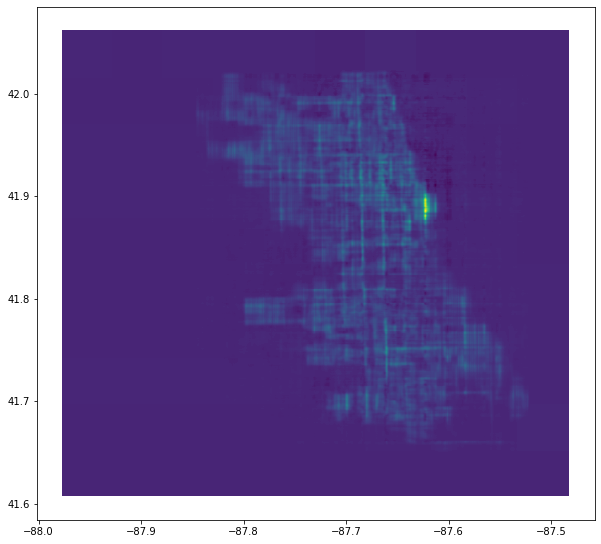

In [84]:
gdf_dissolved[["geometry","density"]].plot(column='density',figsize=(10,10))

In [78]:
#gdf_dissolved.to_csv("2017-11-11_4_test")

In [85]:
gdf_dissolved.to_file("2017-11-11_4_test.geojson", driver='GeoJSON')